In [1]:
import pandas as pd
import requests
import time
import re
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

URL = "https://thinkil.co.il/texts-sitemap.xml"
TSV_FILENAME = "ex2_articles.tsv"
HEBREW_STOPWORDS = "heb_stopwords.txt"

In [2]:
# Get urls from sitemap
def get_page_list_from_sitemap(url):
    # Get html from url
    print("Loading sitemap...")
    page_html = requests.get(url)
    print("Done.")
    # Create soup object
    page_soup = BeautifulSoup(page_html.text)
    # Remove html from text, convert all text to lower case
    page_text = page_soup.get_text().lower()
    # Keep each url in separate line
    page_list = page_text.splitlines()

    return page_list

# Senetize list
def senetize_list(page_list):
    # Remove empty lines
    url_list = [line for line in page_list if len(line) > 0]
    # Remove non url lines
    url_list = [line for line in url_list if line.startswith("https://thinkil.co.il/")]
    # Remove urls of images
    url_list = [line for line in url_list if (not line.endswith(".jpg") and (not line.endswith(".png")))]
    # Remove table of contents url
    url_list = url_list[1:]

    return url_list

# Senetize text
def senetize_text(text):
    # Remove whitespaces from the beginning and the end of the text
    text = text.strip()
    # Keep only hebrew characters and spaces
    # text = re.sub('[^\u0590-\u05fe ]', '', text)
    # Remove all excess whitespaces from the text
    text = re.sub('\s+', ' ', text)

    return text

# Get articles content
def get_articles_content(url_list):
    articles_list = []
    for i, article_url in enumerate(url_list):
        # Print progress
        print(f"Loading article {str(i + 1)} out of {str(len(url_list) + 1)}...")

        # Get html from url
        article_html = requests.get(article_url)
        # Create soup object
        article_soup = BeautifulSoup(article_html.text)

        # Get article's title
        article_title = article_soup.find("h1", {"class": "page-title"}).get_text()
        # Senetize text
        article_title = senetize_text(article_title)

        # Get article's authors
        article_authors = article_soup.find_all("span", {"class": "author-name"})
        # Senetize and convert to set to remove duplicates
        article_authors_set = set(senetize_text(author_name.get_text()) for author_name in article_authors)
        # Convert set to comma separated string
        article_authors = ", ".join(article_authors_set)

        # Get article's content
        article_text = article_soup.find("div", {"id": "content"}).get_text()
        # Senetize text
        article_text = senetize_text(article_text)

        # Add new row to dataframe
        articles_list.append([article_url, article_authors, article_title, article_text])

        # Wait for 1 second
        time.sleep(1)

    print("Done.")
    return articles_list

# Create TSV file
def create_tsv_file(articles_list):
    # Create dataframe
    articles = pd.DataFrame(articles_list, columns=["url", "author", "title", "text"])
    # Save dataframe to TSV file
    articles.to_csv(TSV_FILENAME, sep="\t",  encoding="utf-8")
    print(F"Articles contant saved to '{TSV_FILENAME}'.")


page_list = get_page_list_from_sitemap(URL)
url_list = senetize_list(page_list)
articles_list = get_articles_content(url_list)
create_tsv_file(articles_list)

Loading sitemap...
Done.
Loading article 1 out of 283...
Loading article 2 out of 283...
Loading article 3 out of 283...
Loading article 4 out of 283...
Loading article 5 out of 283...
Loading article 6 out of 283...
Loading article 7 out of 283...
Loading article 8 out of 283...
Loading article 9 out of 283...
Loading article 10 out of 283...
Loading article 11 out of 283...
Loading article 12 out of 283...
Loading article 13 out of 283...
Loading article 14 out of 283...
Loading article 15 out of 283...
Loading article 16 out of 283...
Loading article 17 out of 283...
Loading article 18 out of 283...
Loading article 19 out of 283...
Loading article 20 out of 283...
Loading article 21 out of 283...
Loading article 22 out of 283...
Loading article 23 out of 283...
Loading article 24 out of 283...
Loading article 25 out of 283...
Loading article 26 out of 283...
Loading article 27 out of 283...
Loading article 28 out of 283...
Loading article 29 out of 283...
Loading article 30 out of 2

In [3]:
# Get articles list for analysis
def get_articles_list_from_tsv(path):
    return pd.read_csv(path, sep='\t')

articles_list = get_articles_list_from_tsv(TSV_FILENAME)
articles = articles_list["text"]

# Get hebrew stopwords
def get_hebrew_stopwords(path):
    with open(path, encoding="utf-8") as in_file:
        return set(in_file.read().splitlines())

hebrew_stopwords = get_hebrew_stopwords(HEBREW_STOPWORDS)

In [4]:
# Q1 - Convert a text to list of words spearated by space
def get_list_of_words(text):
    return text.split()

# Convert a text to list of bigrams (two words) spearated by space
def get_list_of_bigrams(text):
    words = get_list_of_words(text)
    return [f"{words[i]} {words[i+1]}" for i in range(len(words)-1)]

# Remove stopwords from a list of words
def remove_stopwords(words_list, stopwords):
    return [word for word in words_list if word not in stopwords]

# Remove from list of bigrams all bigrams with stopword in them
def remove_stopwords_from_bigrams(bigrams_list, stopwords):
    return [bigram for bigram in bigrams_list if len(set(bigram.split()) & set(stopwords)) == 0]

# Plot histogram of words frequency
def plot_histogram(words_dataframe, color='blue'):
    # Get words
    keys = [x[0] for x in words_dataframe.keys()]
    # Reverse text of each key
    keys = [key[::-1] for key in keys]
    
    # Plot histogram
    plt.barh(keys, words_dataframe.values, color=color)
    plt.show()
    plt.close()


3466 3153 5741 3525 3762 5133 5317 5434 4282 9615 6795 7604 4365 4522 3412 4742 4399 4160 4002 2485 2696 3565 2645 2233 3066 3334 4464 3559 2832 3721 17502 3997 5390 4481 2480 4298 6851 3223 4628 6612 1869 9171 3974 4119 3254 5932 4109 3470 4279 4131 6724 7248 6678 4563 4921 6899 5188 5763 3102 6941 3280 3516 26762 4346 1966 1702 2813 5414 4020 3142 4618 4458 6388 2578 6237 3738 5402 3418 5135 2860 4436 3029 7046 3636 2878 4909 3125 4157 5229 717 4417 9305 3533 3978 3220 2658 2999 7048 6787 4091 2382 2424 2935 3514 3623 3997 7333 4675 5084 2883 1920 2839 1689 1387 3222 3134 4706 4364 2210 884 1074 2393 3461 2494 763 4403 2718 3669 1189 2418 3102 3299 2955 3913 3490 3322 3688 3746 3469 3061 3762 2640 4094 3602 4324 3340 2775 1288 4231 6581 5399 2631 3673 3486 1776 3664 2491 2029 1793 1025 231 3923 2232 2363 2679 3252 365 1582 2109 2050 2310 2022 1534 1677 2791 517 3534 1983 286 1667 1681 894 1235 1196 3688 1199 1205 1711 678 2398 815 1250 852 3295 571 1660 1152 629 1894 2733 2436 6993 6

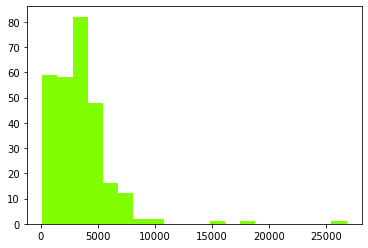

In [5]:
# Q2
def print_words_histogram(articles_list):
    num_of_words = []
    
    # For each article
    for article in articles_list:
        # Convert article's text to list of words
        article_words = get_list_of_words(article)
        # Add number of words to the list
        num_of_words.append(len(article_words))
        # Print result
        print(len(article_words), end=" ")

    # Plot histogram
    plt.hist(num_of_words, bins=20, color='Chartreuse')
    plt.show()
    plt.close()


print_words_histogram(articles)

של     30594
את     18090
על     11384
הוא     7194
לא      7155
זה      4883
—       4762
כל      4634
או      4471
היא     4454
אם      4047
גם      3818
כי      3430
בין     3232
עם      3039
אין     2695
מה      2642
אך      2489
אלא     2486
היה     2409
dtype: int64


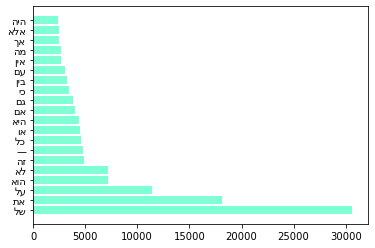

In [6]:
# Q3
def print_histogram_of_most_common_words(articles_list, n):
    all_words = []

    # For each article
    for article in articles_list:
        # Add words to the list
        all_words += get_list_of_words(article)

    # Sort words by frequency and get top n
    sorted_values = pd.DataFrame(all_words).value_counts()
    frequent_words = sorted_values.iloc[:n]

    # Print result
    print(frequent_words)

    # Plot histogram
    plot_histogram(frequent_words, 'Aquamarine')

print_histogram_of_most_common_words(articles, 20)

על ידי        879
על פי         616
את כל         470
לא רק         407
של כל         334
כי אם         290
לא היה        279
של האדם       279
זה של         249
לעומת זאת,    237
על כל         232
על כך         227
על פני        217
להבין את      211
כדור הארץ     202
הרבה יותר     188
אלא גם        187
עם זאת,       184
יותר מאשר     183
זה לא         182
dtype: int64


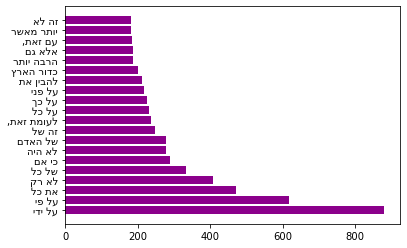

In [7]:
# Q4
def print_histogram_of_most_common_bigrams(articles_list, n):
    all_bigrams = []

    # For each article
    for article in articles_list:
        # Add bigrams to the list
        all_bigrams += get_list_of_bigrams(article)

    # Sort bigrams by frequency and get top n
    sorted_values = pd.DataFrame(all_bigrams).value_counts()
    frequent_bigrams = sorted_values.iloc[:20]

    # Print result
    print(frequent_bigrams)

    # Plot histogram
    plot_histogram(frequent_bigrams, 'DarkMagenta')

print_histogram_of_most_common_bigrams(articles, 20)

—        4762
–        2110
אינו     1366
אשר      1294
האדם     1266
ידי       938
אינה      901
פי        837
ע״י       812
למשל,     789
זאת,      770
כפי       730
מערכת     710
לבין      700
כיוון     688
כיצד      671
?         666
אצל       664
בכך       646
משום      640
dtype: int64


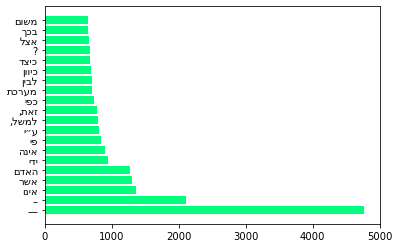

In [8]:
# Q5
def print_histogram_of_most_common_non_stopword_words(articles_list, n, stopwords):
    all_words = []

    # For each article
    for article in articles_list:
        # Add non stopword words to the list
        all_words += remove_stopwords(get_list_of_words(article), stopwords)

    # Sort words by frequency and get top n
    sorted_values = pd.DataFrame(all_words).value_counts()
    frequent_words = sorted_values.iloc[:n]

    # Print result
    print(frequent_words)

    # Plot histogram
    plot_histogram(frequent_words, 'SpringGreen')

print_histogram_of_most_common_non_stopword_words(articles, 20, hebrew_stopwords)

לעומת זאת,        237
כדור הארץ         202
במילים אחרות,     119
תורת היחסות       100
הבירור הטבעי       89
כך, למשל,          84
כדור הארץ.         79
מצד שני,           77
בעת ובעונה         76
פני כדור           75
במלים אחרות,       73
באותה מידה         67
חברת י.ב.מ.        63
יתרה מזו,          60
כיוון שכך,         59
השנים האחרונות     58
מצד אחד,           56
המפץ הגדול         55
בשנים האחרונות     55
כלומר —            54
dtype: int64


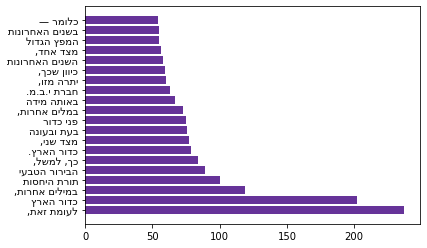

In [9]:
# Q6
def print_histogram_of_most_common_non_stopword_bigrams(articles_list, n, stopwords):
    all_bigrams = []

    # For each article
    for article in articles_list:
        # Add non stopword bigrams to the list
        all_bigrams += remove_stopwords_from_bigrams(get_list_of_bigrams(article), stopwords)

    # Sort bigrams by frequency and get top n
    sorted_values = pd.DataFrame(all_bigrams).value_counts()
    frequent_bigrams = sorted_values.iloc[:n]

    # Print result
    print(frequent_bigrams)

    # Plot histogram
    plot_histogram(frequent_bigrams, 'RebeccaPurple')

print_histogram_of_most_common_non_stopword_bigrams(articles, 20, hebrew_stopwords)

## שאלה 3 - ניתוח

### סעיף א
אנו רואים בעיקר מילים וזוגות מילים שקשורים למדע מודרני. דוגמאות : 
כדור הארץ, תורת היחסות, חברת י.ב.מ
אנו רואים שצבי ינאי מופיע הרבה ולקח חלק גדול בכתיבת המאמרים.

### סעיף ב
בעברית יש הרבה שימוש ב

stop words,

שקשה להבין בעזרתן על מה הטקסט מדבר,
יכולנו להסיק את תוכן הטקסטים רק לאחר שניקינו מילים אלו מהסטטיסטיקה.
כשמדובר בזוגות מילים, עדיין הזוגות השכיחים ביותר מכילים 

stop words,

עם זאת זה פחות שכיח מאשר במילים בודדות.
עדיין ניתן למצוא מילים בעלות משמעות כמו "כדור הארץ" ב20 זוגות המילים הנפוצות ביותר.

### סעיף ג
מופיעים הרבה סימני פיסוק (מקף, פסיק), טאבים, ירידת שורה שצריך לנקות מהטקסט למרות שאינם קשורים לעברית או אנגלית.
בנוסף, על מנת לקבל רק את הקישורים למאמרים, יש צורך לנקות את קישורי התמונות.
